# Data Visulaization

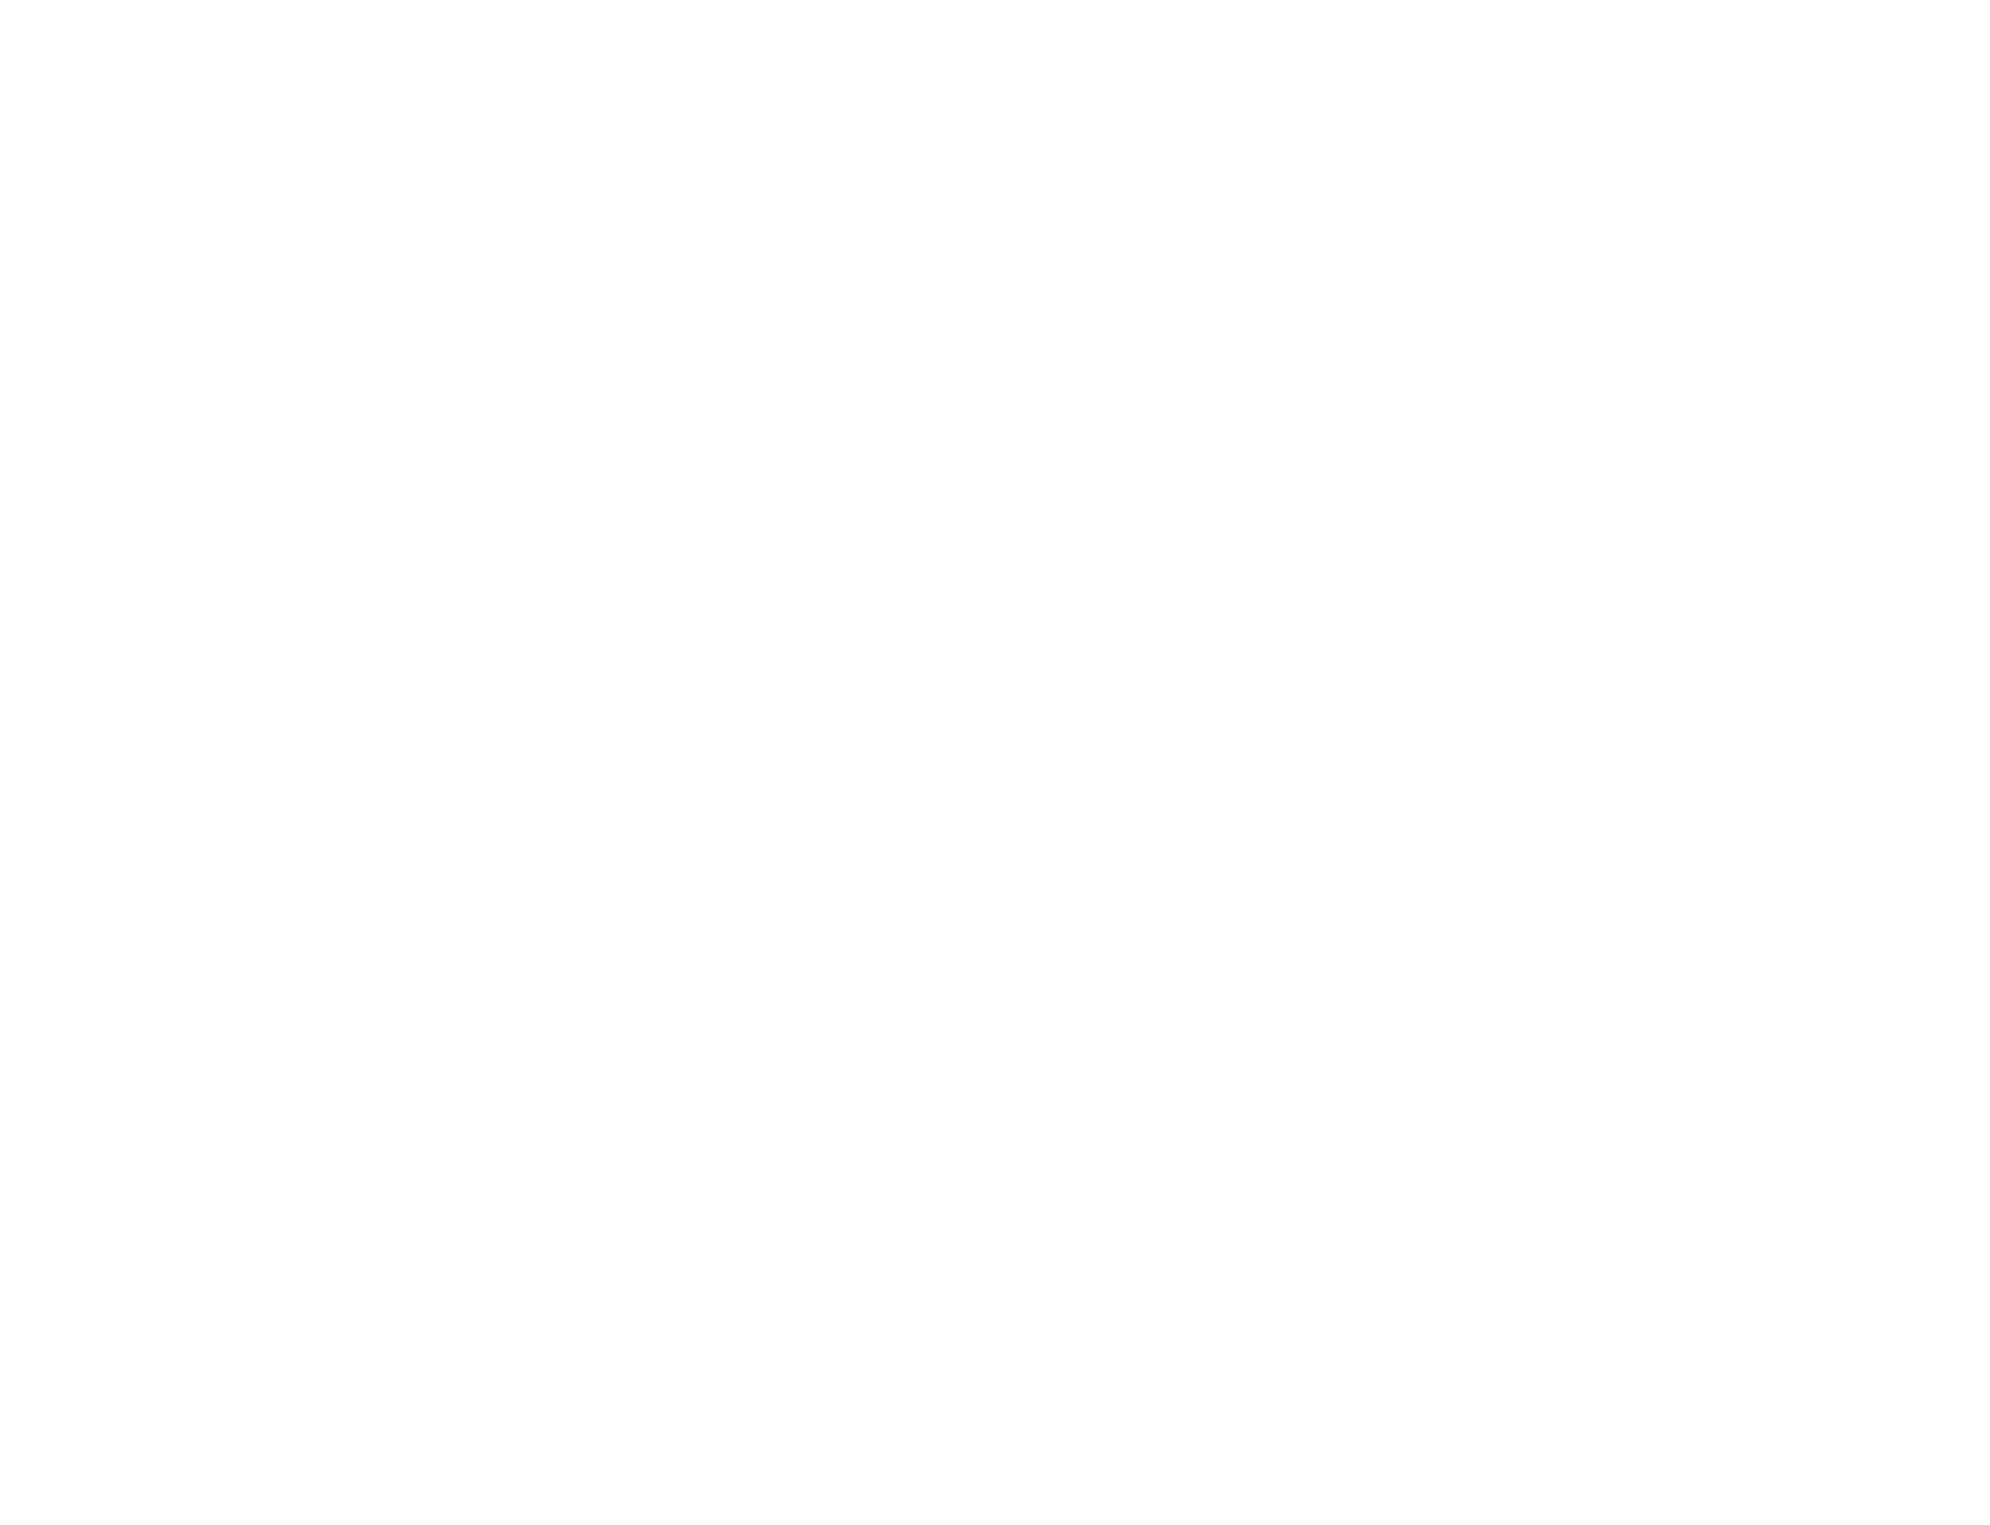

In [3]:
import os
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from rasterio.plot import show
from glob import glob
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib_scalebar.scalebar import ScaleBar

# Define base directory where GeoTIFFs are stored
base_dir = 'C:/Users/GeoPeter/OneDrive/Documents/ML Research/ML'

# Variable names with display names and units (using high-contrast colormap)
variables = {
    "Nigeria_Surface soil moisture": {
        "name": "Surface Soil Moisture",
        "cmap": "turbo",
        "unit": "kg/m²"
    },
    "Nigeria_Root_zone_soil_moisture": {
        "name": "Root Zone Soil Moisture", 
        "cmap": "turbo",
        "unit": "kg/m²"
    },
    "Nigeria_Evapotranspiration": {
        "name": "Evapotranspiration",
        "cmap": "turbo",
        "unit": "mm/day"
    },
    "Nigeria_Transpiration": {
        "name": "Transpiration",
        "cmap": "turbo",
        "unit": "mm/day"
    },
    "Nigeria_Canopy_water_content": {
        "name": "Canopy Water Content",
        "cmap": "turbo",
        "unit": "kg/m²"
    },
    "Nigeria_Precipitation": {
        "name": "Precipitation",
        "cmap": "turbo",
        "unit": "mm/day"
    },
    "Nigeria_Vegetation_Index": {
        "name": "NDVI",
        "cmap": "turbo",
        "unit": "Index"
    },
    "Nigeria_SPEI_12month": {
        "name": "SPEI",
        "cmap": "turbo",
        "unit": "Index"
    }
}

# Dictionary to hold loaded rasters for 2023
raster_2023 = {}

# Search and load the first matching file from 2023 for each variable
for var, info in variables.items():
    pattern = os.path.join(base_dir, f"*{var}*2023*.tif")
    matching_files = sorted(glob(pattern))
    if matching_files:
        filepath = matching_files[0]
        with rasterio.open(filepath) as src:
            raster_2023[var] = {
                "data": src.read(1),
                "meta": src.meta,
                "transform": src.transform,
                "bounds": src.bounds,
                "title": info["name"],
                "cmap": info["cmap"],
                "unit": info["unit"],
                "file": os.path.basename(filepath)
            }

def add_north_arrow(ax, x=0.95, y=0.95, size=0.04):
    """Add a professional north arrow to the map"""
    arrow_body = mpatches.Polygon([
        (x - size/4, y - size), 
        (x + size/4, y - size),
        (x + size/4, y - size/3),
        (x + size/2, y - size/3),
        (x, y),
        (x - size/2, y - size/3),
        (x - size/4, y - size/3)
    ], transform=ax.transAxes, facecolor='black', edgecolor='white', linewidth=1)
    
    ax.add_patch(arrow_body)
    ax.text(x, y - size*1.3, 'N', transform=ax.transAxes, 
            fontsize=12, fontweight='bold', ha='center', va='center',
            bbox=dict(boxstyle="round,pad=0.1", facecolor='white', edgecolor='black'))

# Create the figure with 3x3 subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 16))
axes = axes.flatten()

# Plot each variable
plot_index = 0
for var, info in raster_2023.items():
    if plot_index < len(axes):
        ax = axes[plot_index]
        extent = [info["bounds"].left, info["bounds"].right, info["bounds"].bottom, info["bounds"].top]

        # Plot raster with geographic extent
        im = ax.imshow(info["data"], cmap=info["cmap"],
                       extent=extent, origin='upper')
        
        ax.set_title(f"{info['title']} (2023)", fontsize=16, fontweight='bold', pad=20)
        ax.set_xlabel('Longitude', fontsize=18)
        ax.set_ylabel('Latitude', fontsize=18)
        ax.tick_params(labelsize=14)

        # Add north arrow and scale bar (inside the loop!)
        add_north_arrow(ax)
        scalebar = ScaleBar(111000, units='m', location='lower left', box_alpha=0.7,
                            length_fraction=0.25, scale_loc='bottom',
                            color='black', box_color='white')
        ax.add_artist(scalebar)

        # Add colorbar
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.1)
        mappable = ax.images[0] if ax.images else None
        if mappable:
            cbar = plt.colorbar(mappable, cax=cax)
            cbar.set_label(f'{info["unit"]}', fontsize=14, rotation=90, labelpad=20)
            cbar.ax.tick_params(labelsize=12)

        plot_index += 1

# Hide empty subplots
for j in range(plot_index, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.95, hspace=0.3, wspace=0.37)

# Save as PNG and SVG
plt.savefig('Figure2.png', dpi=500, bbox_inches='tight', facecolor='white')
plt.savefig('Figure2.svg', dpi=500, bbox_inches='tight', facecolor='white')
plt.show()


In [ ]:
##PLOTS

Creating SPEI visualization with colored dotted points...
\n1. Creating dotted points comparison...
Available models: ['lgb', 'xgb', 'lstm']
Available years for plotting: [2006, 2009, 2012, 2015, 2018, 2023]


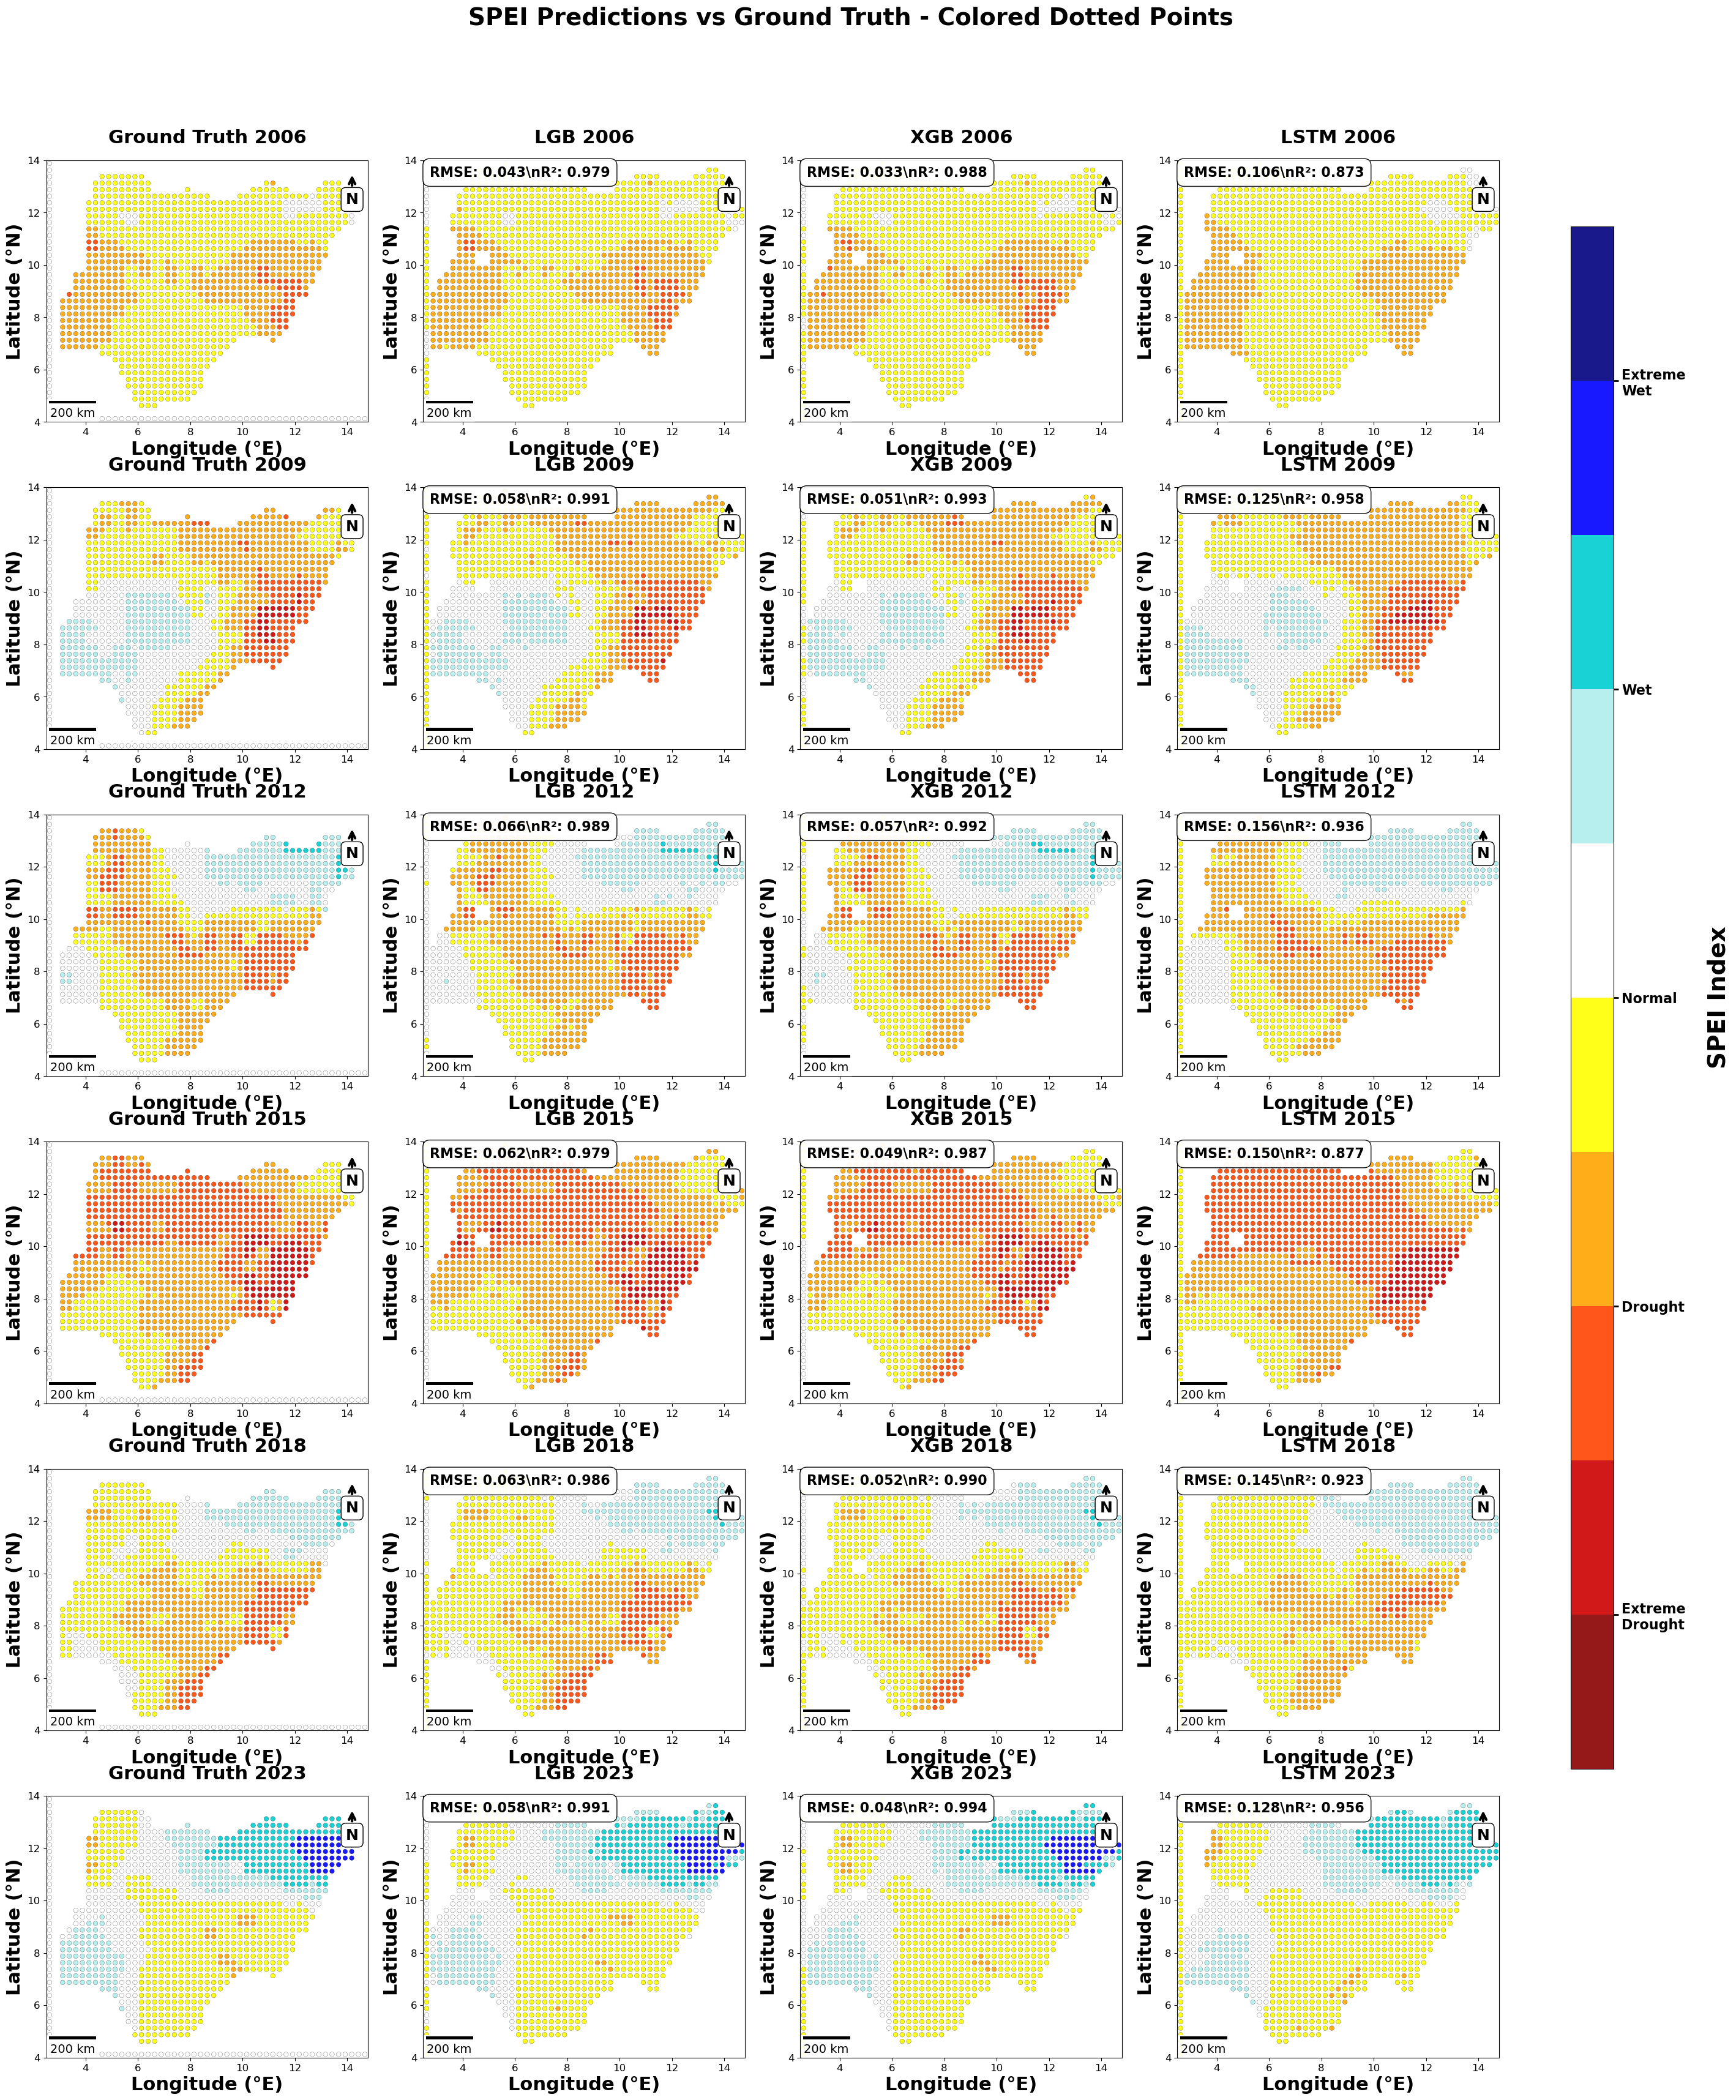

\n2. Creating model performance summary...


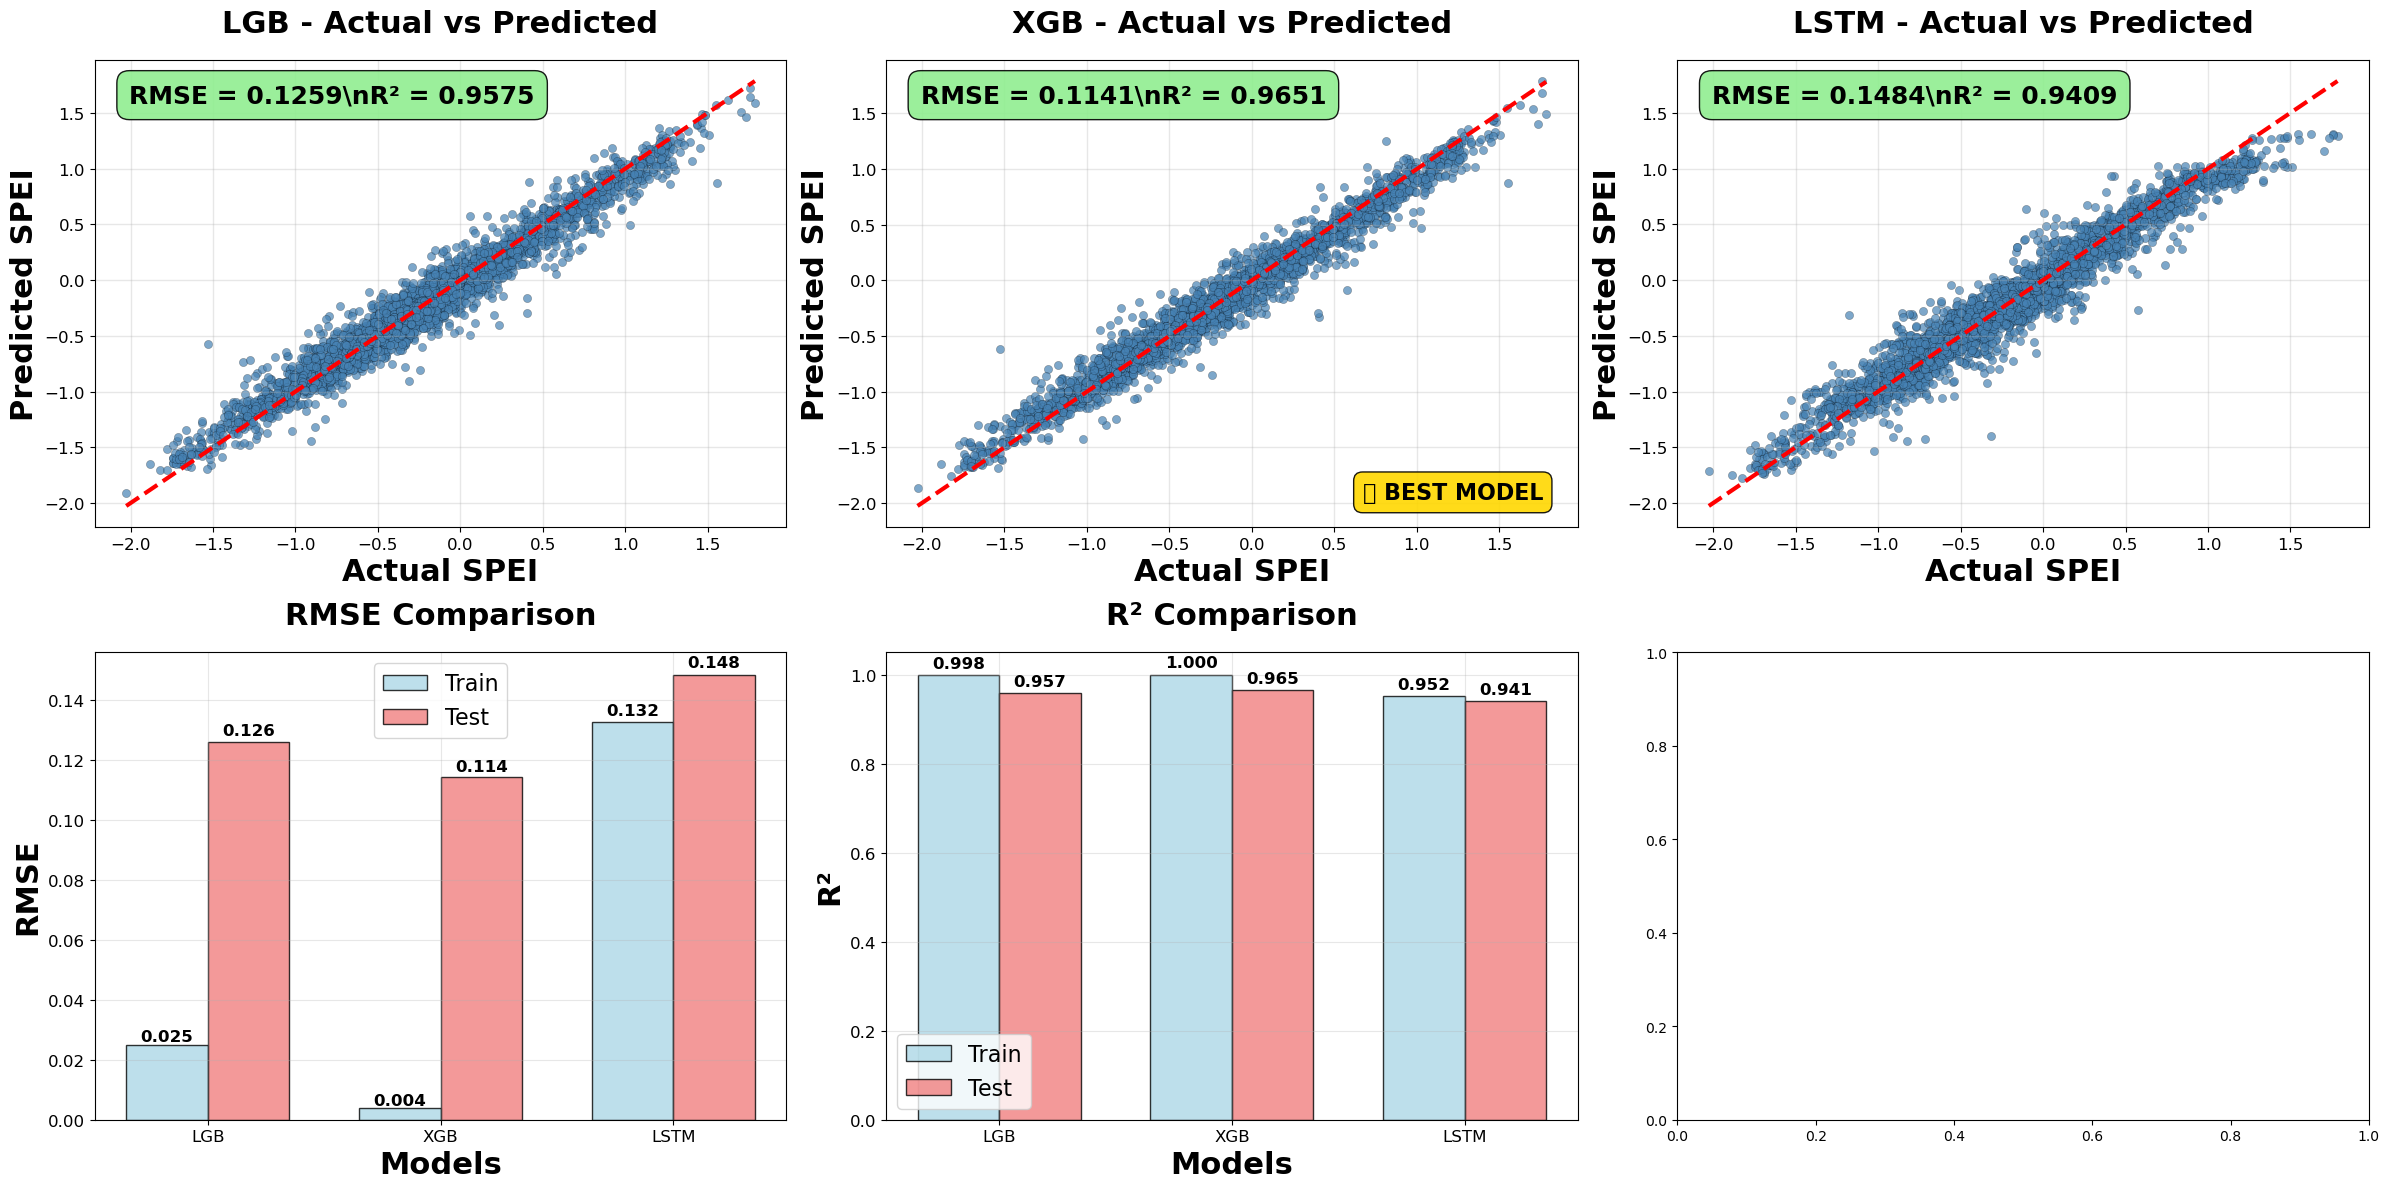

\n3. Creating feature importance plots...


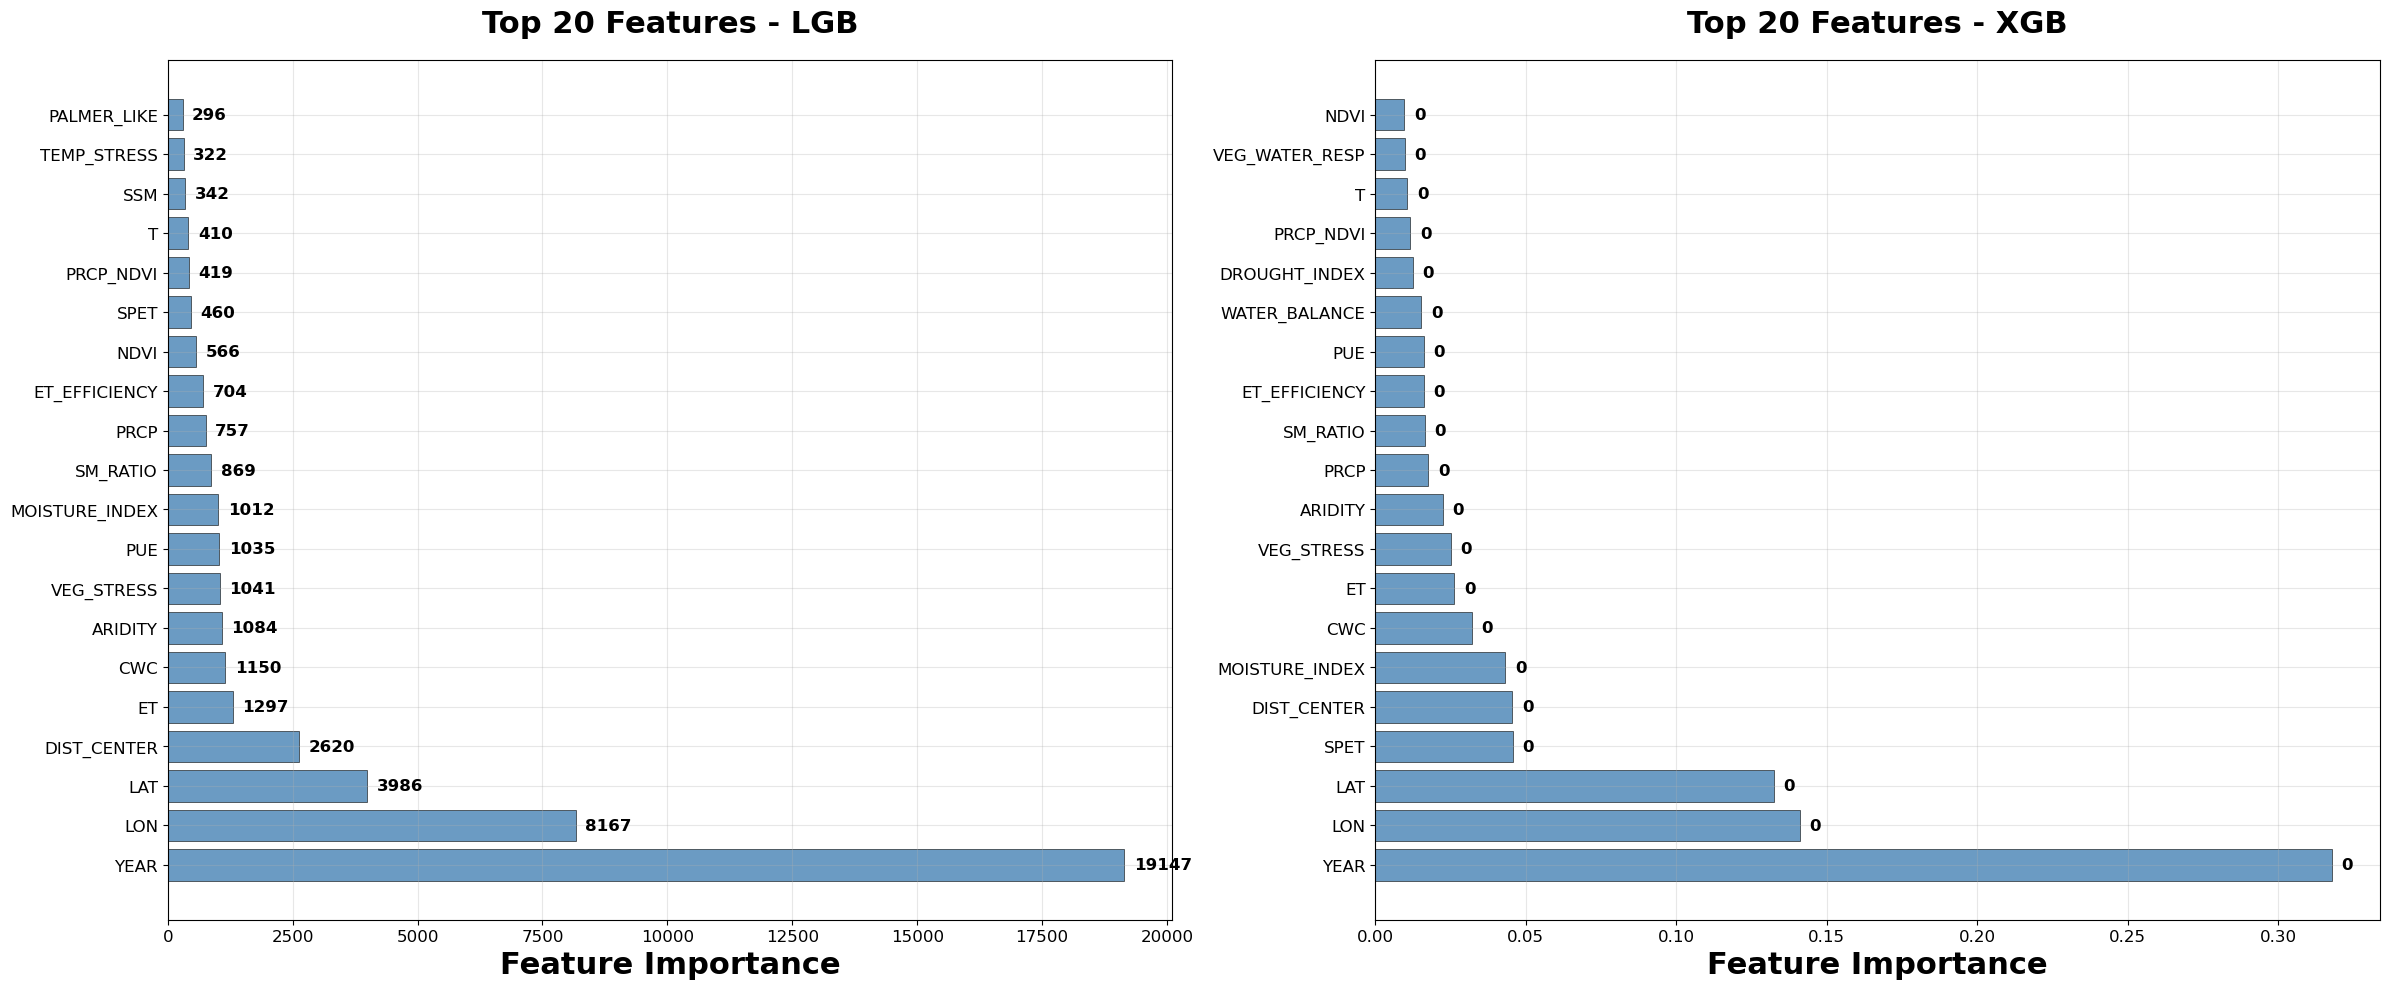

\n============================================================
All dotted plots created successfully!
\nFiles saved:
- spei_dotted_comparison.png
- model_performance_summary_dotted.png
- feature_importance_dotted.png


In [35]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from matplotlib.colors import ListedColormap
from sklearn.metrics import mean_squared_error, r2_score
try:
    from matplotlib_scalebar.scalebar import ScaleBar
except ImportError:
    print("Installing matplotlib-scalebar...")
    import subprocess
    subprocess.check_call(["pip", "install", "matplotlib-scalebar"])
    from matplotlib_scalebar.scalebar import ScaleBar

def add_map_elements(ax):
    """Add north arrow, scale bar, and proper axes to map"""
    # Set equal aspect ratio to prevent compression
    ax.set_aspect('equal', adjustable='box')
    
    # Add north arrow
    arrow_props = dict(arrowstyle='->', lw=3, color='black')
    ax.annotate('N', xy=(0.95, 0.95), xytext=(0.95, 0.85),
               xycoords='axes fraction', textcoords='axes fraction',
               ha='center', va='center', fontsize=18, fontweight='bold',
               arrowprops=arrow_props,
               bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='black'))
    
    # Add scale bar
    scalebar = ScaleBar(111000, units='m', location='lower left', 
                       length_fraction=0.25, box_alpha=0.9,
                       color='black', box_color='white', font_properties={'size': 14})
    ax.add_artist(scalebar)
    
    # Add coordinate labels with larger fonts
    ax.set_xlabel('Longitude (°E)', fontsize=22, fontweight='bold')
    ax.set_ylabel('Latitude (°N)', fontsize=22, fontweight='bold')
    ax.tick_params(labelsize=12)

def extract_valid_coordinates_and_values(data_array, target_transform):
    """Extract coordinates and values from valid (non-NaN) pixels"""
    if data_array is None:
        return [], [], []
    
    height, width = data_array.shape
    valid_mask = ~np.isnan(data_array)
    
    if not np.any(valid_mask):
        return [], [], []
    
    # Get pixel indices
    rows, cols = np.where(valid_mask)
    
    # Convert pixel coordinates to geographic coordinates
    lons = []
    lats = []
    values = []
    
    for row, col in zip(rows, cols):
        lon, lat = rasterio.transform.xy(target_transform, row, col)
        value = data_array[row, col]
        if np.isfinite(value):  # Double-check for valid values
            lons.append(lon)
            lats.append(lat)
            values.append(value)
    
    return lons, lats, values

def plot_spei_comparison_all_models():
    """Plot ground truth vs predictions using colored dotted points"""
    
    # Define years to plot and SPEI colormap
    plot_years = [2006, 2009, 2012, 2015, 2018, 2023]
    spei_colors = ['#8B0000', '#CD0000', '#FF4500', '#FFA500', '#FFFF00', 
                  '#FFFFFF', '#AFEEEE', '#00CED1', '#0000FF', '#000080']
    spei_cmap = ListedColormap(spei_colors)
    
    # Get available models from the predictor results
    available_models = list(predictor.results.keys())
    print(f"Available models: {available_models}")
    
    # Filter years that exist in predictions
    available_years = [year for year in plot_years if year in predictor.predictions]
    print(f"Available years for plotting: {available_years}")
    
    if not available_years:
        print("No data available for the specified years!")
        return
    
    # Set coordinate bounds for Nigeria
    bounds = [2.5, 14.8, 4.0, 14.0]  # [west, east, south, north]
    
    # Create figure with subplots: rows=years, cols=ground_truth + models
    n_cols = 1 + len(available_models)  # Ground truth + models
    n_rows = len(available_years)
    
    # Calculate proper figure size to maintain aspect ratio
    # Nigeria span: ~12.3° lon x ~10° lat, so width should be ~1.23x height
    map_width = 7  # base width per map
    map_height = 6  # base height per map
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(map_width*n_cols, map_height*n_rows))
    
    # Handle single row case
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    elif n_cols == 1:
        axes = axes.reshape(-1, 1)
    
    # Plot for each year
    for row_idx, year in enumerate(available_years):
        pred_data = predictor.predictions[year]
        ground_truth = pred_data['ground_truth']
        
        # Ground Truth (first column)
        ax_gt = axes[row_idx, 0] if n_cols > 1 else axes[row_idx]
        
        if ground_truth is not None:
            # Extract valid coordinates and values
            lons, lats, values = extract_valid_coordinates_and_values(
                ground_truth, predictor.target_transform)
            
            if len(values) > 0:
                scatter = ax_gt.scatter(lons, lats, c=values, cmap=spei_cmap, 
                                      vmin=-2.5, vmax=2.5, s=30, alpha=0.9, 
                                      edgecolors='black', linewidths=0.2)
                ax_gt.set_xlim(bounds[0], bounds[1])
                ax_gt.set_ylim(bounds[2], bounds[3])
                ax_gt.set_title(f'Ground Truth {year}', fontsize=22, fontweight='bold', pad=20)
                add_map_elements(ax_gt)
                
                # Store scatter for colorbar reference
                im_ref = scatter
            else:
                ax_gt.text(0.5, 0.5, f'No Valid Data\\nGround Truth {year}', 
                          ha='center', va='center', transform=ax_gt.transAxes, 
                          fontsize=18, fontweight='bold')
                ax_gt.set_xlim(bounds[0], bounds[1])
                ax_gt.set_ylim(bounds[2], bounds[3])
                add_map_elements(ax_gt)
        else:
            ax_gt.text(0.5, 0.5, f'No Ground Truth\\n{year}', ha='center', va='center', 
                      transform=ax_gt.transAxes, fontsize=18, fontweight='bold')
            ax_gt.set_xlim(bounds[0], bounds[1])
            ax_gt.set_ylim(bounds[2], bounds[3])
            add_map_elements(ax_gt)
        
        # Model predictions (remaining columns)
        for col_idx, model_name in enumerate(available_models):
            ax_pred = axes[row_idx, col_idx + 1] if n_cols > 1 else axes[row_idx]
            
            if model_name in pred_data['predictions']:
                predicted = pred_data['predictions'][model_name]
                
                # Extract valid coordinates and values
                pred_lons, pred_lats, pred_values = extract_valid_coordinates_and_values(
                    predicted, predictor.target_transform)
                
                if len(pred_values) > 0:
                    scatter_pred = ax_pred.scatter(pred_lons, pred_lats, c=pred_values, 
                                                 cmap=spei_cmap, vmin=-2.5, vmax=2.5, 
                                                 s=30, alpha=0.9, edgecolors='black', 
                                                 linewidths=0.2)
                    ax_pred.set_xlim(bounds[0], bounds[1])
                    ax_pred.set_ylim(bounds[2], bounds[3])
                    ax_pred.set_title(f'{model_name.upper()} {year}', fontsize=22, 
                                    fontweight='bold', pad=20)
                    add_map_elements(ax_pred)
                    
                    # Store scatter for colorbar reference if not already set
                    if 'im_ref' not in locals():
                        im_ref = scatter_pred
                    
                    # Add spatial metrics if ground truth available
                    if ground_truth is not None and len(values) > 0:
                        # Find overlapping valid pixels for comparison
                        gt_lons, gt_lats, gt_values = extract_valid_coordinates_and_values(
                            ground_truth, predictor.target_transform)
                        
                        if len(gt_values) > 0 and len(pred_values) > 0:
                            # Use the raster arrays for proper pixel-wise comparison
                            valid_mask = ~(np.isnan(ground_truth) | np.isnan(predicted))
                            if np.sum(valid_mask) > 0:
                                spatial_rmse = np.sqrt(mean_squared_error(
                                    ground_truth[valid_mask], predicted[valid_mask]))
                                spatial_r2 = r2_score(ground_truth[valid_mask], predicted[valid_mask])
                                
                                # Add metrics text box with larger font
                                ax_pred.text(0.02, 0.98, f'RMSE: {spatial_rmse:.3f}\\nR²: {spatial_r2:.3f}',
                                           transform=ax_pred.transAxes, verticalalignment='top',
                                           bbox=dict(boxstyle="round,pad=0.5", facecolor='white', 
                                                   alpha=0.95, edgecolor='black'),
                                           fontsize=16, fontweight='bold')
                else:
                    ax_pred.text(0.5, 0.5, f'No Valid Data\\n{model_name.upper()} {year}', 
                               ha='center', va='center', transform=ax_pred.transAxes, 
                               fontsize=18, fontweight='bold')
                    ax_pred.set_xlim(bounds[0], bounds[1])
                    ax_pred.set_ylim(bounds[2], bounds[3])
                    add_map_elements(ax_pred)
            else:
                ax_pred.text(0.5, 0.5, f'No {model_name.upper()}\\nPrediction\\n{year}', 
                           ha='center', va='center', transform=ax_pred.transAxes, 
                           fontsize=18, fontweight='bold')
                ax_pred.set_xlim(bounds[0], bounds[1])
                ax_pred.set_ylim(bounds[2], bounds[3])
                add_map_elements(ax_pred)
    
    # Add main colorbar with larger fonts and better spacing
    cbar_ax = fig.add_axes([0.92, 0.15, 0.025, 0.7])
    if 'im_ref' in locals():
        cbar = fig.colorbar(im_ref, cax=cbar_ax)
        cbar.set_label('SPEI Index', rotation=90, labelpad=25, fontsize=28, fontweight='bold')
        
        # Simplified, readable colorbar labels
        cbar_ticks = [-2.0, -1.0, 0.0, 1.0, 2.0]
        cbar_labels = ['Extreme\nDrought', 'Drought', 'Normal', 'Wet', 'Extreme\nWet']
        cbar.set_ticks(cbar_ticks)
        cbar.set_ticklabels(cbar_labels, fontsize=16, fontweight='bold')
        cbar.ax.tick_params(labelsize=16, width=2, length=6)
    
    plt.suptitle('SPEI Predictions vs Ground Truth - Colored Dotted Points', 
                fontsize=28, fontweight='bold', y=0.95)
    
    # Adjust spacing to prevent compression
    plt.tight_layout()
    plt.subplots_adjust(top=0.88, right=0.88, wspace=0.15, hspace=0.25)
    plt.savefig('spei_dotted_comparison.png', dpi=500, bbox_inches='tight', 
                facecolor='white', edgecolor='none')
    plt.show()

def plot_model_performance_summary():
    """Plot model performance summary with larger fonts"""
    
    available_models = list(predictor.results.keys())
    n_models = len(available_models)
    
    fig, axes = plt.subplots(2, n_models, figsize=(8*n_models, 12))
    
    if n_models == 1:
        axes = axes.reshape(-1, 1)
    
    # Top row: 1:1 scatter plots
    for idx, model_name in enumerate(available_models):
        ax = axes[0, idx]
        
        y_true = predictor.results[model_name]['y_true_test']
        y_pred = predictor.results[model_name]['y_pred_test']
        
        # Scatter plot with larger points
        ax.scatter(y_true, y_pred, alpha=0.7, s=35, color='steelblue', edgecolors='black', linewidths=0.2)
        ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=3)
        
        ax.set_xlabel('Actual SPEI', fontsize=22, fontweight='bold')
        ax.set_ylabel('Predicted SPEI', fontsize=22, fontweight='bold')
        ax.set_title(f'{model_name.upper()} - Actual vs Predicted', fontsize=22, fontweight='bold', pad=20)
        ax.grid(True, alpha=0.3, linewidth=1)
        ax.tick_params(labelsize=12)
        
        # Add performance metrics with larger fonts
        rmse = predictor.results[model_name]['test_rmse']
        r2 = predictor.results[model_name]['test_r2']
        
        # Color code the metrics
        if r2 > 0.9:
            color = 'lightgreen'
        elif r2 > 0.7:
            color = 'lightblue'
        else:
            color = 'lightyellow'
            
        ax.text(0.05, 0.95, f'RMSE = {rmse:.4f}\\nR² = {r2:.4f}', 
               transform=ax.transAxes, 
               bbox=dict(boxstyle="round,pad=0.5", facecolor=color, alpha=0.9, edgecolor='black'),
               verticalalignment='top', fontsize=18, fontweight='bold')
        
        # Add best model indicator
        if model_name == predictor.best_model:
            ax.text(0.95, 0.05, '⭐ BEST MODEL', transform=ax.transAxes,
                   ha='right', va='bottom', fontsize=16, fontweight='bold',
                   bbox=dict(boxstyle="round,pad=0.4", facecolor='gold', alpha=0.9, edgecolor='black'))
    
    # Bottom row: Performance comparison bars
    models_upper = [m.upper() for m in available_models]
    train_rmse = [predictor.results[m]['train_rmse'] for m in available_models]
    test_rmse = [predictor.results[m]['test_rmse'] for m in available_models]
    train_r2 = [predictor.results[m]['train_r2'] for m in available_models]
    test_r2 = [predictor.results[m]['test_r2'] for m in available_models]
    
    # RMSE comparison
    ax_rmse = axes[1, 0] if n_models > 1 else axes[1, 0]
    
    x = np.arange(len(available_models))
    width = 0.35
    
    bars1 = ax_rmse.bar(x - width/2, train_rmse, width, label='Train', alpha=0.8, 
                       color='lightblue', edgecolor='black', linewidth=1)
    bars2 = ax_rmse.bar(x + width/2, test_rmse, width, label='Test', alpha=0.8, 
                       color='lightcoral', edgecolor='black', linewidth=1)
    
    ax_rmse.set_xlabel('Models', fontsize=22, fontweight='bold')
    ax_rmse.set_ylabel('RMSE', fontsize=22, fontweight='bold')
    ax_rmse.set_title('RMSE Comparison', fontsize=22, fontweight='bold', pad=20)
    ax_rmse.set_xticks(x)
    ax_rmse.set_xticklabels(models_upper, fontsize=14)
    ax_rmse.legend(fontsize=16)
    ax_rmse.grid(True, alpha=0.3)
    ax_rmse.tick_params(labelsize=12)
    
    # Add value labels on bars
    for bar in bars1 + bars2:
        height = bar.get_height()
        ax_rmse.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                    f'{height:.3f}', ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    # R² comparison (if more than one model)
    if n_models > 1:
        ax_r2 = axes[1, 1] if n_models > 2 else axes[1, 1] if n_models == 2 else ax_rmse
        
        if ax_r2 != ax_rmse:
            bars3 = ax_r2.bar(x - width/2, train_r2, width, label='Train', alpha=0.8, 
                             color='lightblue', edgecolor='black', linewidth=1)
            bars4 = ax_r2.bar(x + width/2, test_r2, width, label='Test', alpha=0.8, 
                             color='lightcoral', edgecolor='black', linewidth=1)
            
            ax_r2.set_xlabel('Models', fontsize=22, fontweight='bold')
            ax_r2.set_ylabel('R²', fontsize=22, fontweight='bold')
            ax_r2.set_title('R² Comparison', fontsize=22, fontweight='bold', pad=20)
            ax_r2.set_xticks(x)
            ax_r2.set_xticklabels(models_upper, fontsize=14)
            ax_r2.legend(fontsize=16)
            ax_r2.grid(True, alpha=0.3)
            ax_r2.tick_params(labelsize=12)
            
            # Add value labels
            for bar in bars3 + bars4:
                height = bar.get_height()
                ax_r2.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                          f'{height:.3f}', ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    # Hide unused subplots
    for i in range(n_models, axes.shape[1]):
        for j in range(axes.shape[0]):
            if i < axes.shape[1]:
                axes[j, i].axis('off')
    
    plt.tight_layout()
    plt.savefig('model_performance_summary_dotted.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_feature_importance():
    """Plot feature importance for tree-based models with larger fonts"""
    
    tree_models = [m for m in predictor.models.keys() if m in ['lgb', 'xgb']]
    
    if not tree_models:
        print("No tree-based models available for feature importance plotting")
        return
    
    fig, axes = plt.subplots(1, len(tree_models), figsize=(12*len(tree_models), 10))
    
    if len(tree_models) == 1:
        axes = [axes]
    
    for idx, model_name in enumerate(tree_models):
        ax = axes[idx]
        
        if model_name == 'lgb':
            importance = predictor.models[model_name].feature_importance(importance_type='gain')
        else:  # xgb
            importance = predictor.models[model_name].feature_importances_
        
        # Top 20 features
        try:
            import pandas as pd
            importance_df = pd.DataFrame({
                'feature': predictor.feature_names,
                'importance': importance
            }).sort_values('importance', ascending=False).head(20)
        except:
            # Fallback without pandas
            feature_importance_pairs = list(zip(predictor.feature_names, importance))
            feature_importance_pairs.sort(key=lambda x: x[1], reverse=True)
            top_20 = feature_importance_pairs[:20]
            features = [x[0] for x in top_20]
            importances = [x[1] for x in top_20]
            
            class SimpleDF:
                def __init__(self, features, importances):
                    self.feature = features
                    self.importance = importances
                def __len__(self):
                    return len(self.feature)
            importance_df = SimpleDF(features, importances)
        
        bars = ax.barh(range(len(importance_df)), importance_df.importance, 
                      color='steelblue', alpha=0.8, edgecolor='black', linewidth=0.5)
        ax.set_yticks(range(len(importance_df)))
        ax.set_yticklabels(importance_df.feature, fontsize=14)
        ax.set_xlabel('Feature Importance', fontsize=22, fontweight='bold')
        ax.set_title(f'Top 20 Features - {model_name.upper()}', fontsize=22, fontweight='bold', pad=20)
        ax.grid(True, alpha=0.3)
        ax.tick_params(labelsize=12)
        
        # Add value labels
        max_importance = max(importance_df.importance)
        for i, bar in enumerate(bars):
            width = bar.get_width()
            ax.text(width + max_importance*0.01, bar.get_y() + bar.get_height()/2,
                   f'{width:.0f}', ha='left', va='center', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('feature_importance_dotted.png', dpi=300, bbox_inches='tight')
    plt.show()

# Main plotting function to run all plots
def create_all_dotted_plots():
    """Create all visualization plots with colored dotted points"""
    print("Creating SPEI visualization with colored dotted points...")
    print("="*60)
    
    # Check if predictor object exists
    if 'predictor' not in globals():
        print("Error: 'predictor' object not found. Make sure you've run the main pipeline first.")
        return
    
    # Plot 1: Ground truth vs predictions with dotted points
    print("\\n1. Creating dotted points comparison...")
    plot_spei_comparison_all_models()
    
    # Plot 2: Model performance summary
    print("\\n2. Creating model performance summary...")
    plot_model_performance_summary()
    
    # Plot 3: Feature importance
    print("\\n3. Creating feature importance plots...")
    plot_feature_importance()
    
    print("\\n" + "="*60)
    print("All dotted plots created successfully!")
    print("\\nFiles saved:")
    print("- spei_dotted_comparison.png")
    print("- model_performance_summary_dotted.png") 
    print("- feature_importance_dotted.png")

# Import pandas if available
try:
    import pandas as pd
except ImportError:
    print("pandas not found, using fallback for feature importance")

# Run all plots
create_all_dotted_plots()

# Early Warning System

🚨 SPEI EARLY WARNING SYSTEM 🚨
Available ML results for years: [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
Best model: XGB
Early Warning System initialized with XGB model
Using existing ML results - no recalculation needed!
\n📊 Creating Early Warning comparison plots...
Available years in ML results: [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
Requested years: [2006, 2009, 2012, 2015, 2018, 2023]
Years to plot: [2006, 2009, 2012, 2015, 2018, 2023]
Grid layout: 3 rows × 4 cols for 6 years
Plotting year 2006...
Plotting year 2009...
Plotting year 2012...
Plotting year 2015...
Plotting year 2018...
Plotting year 2023...


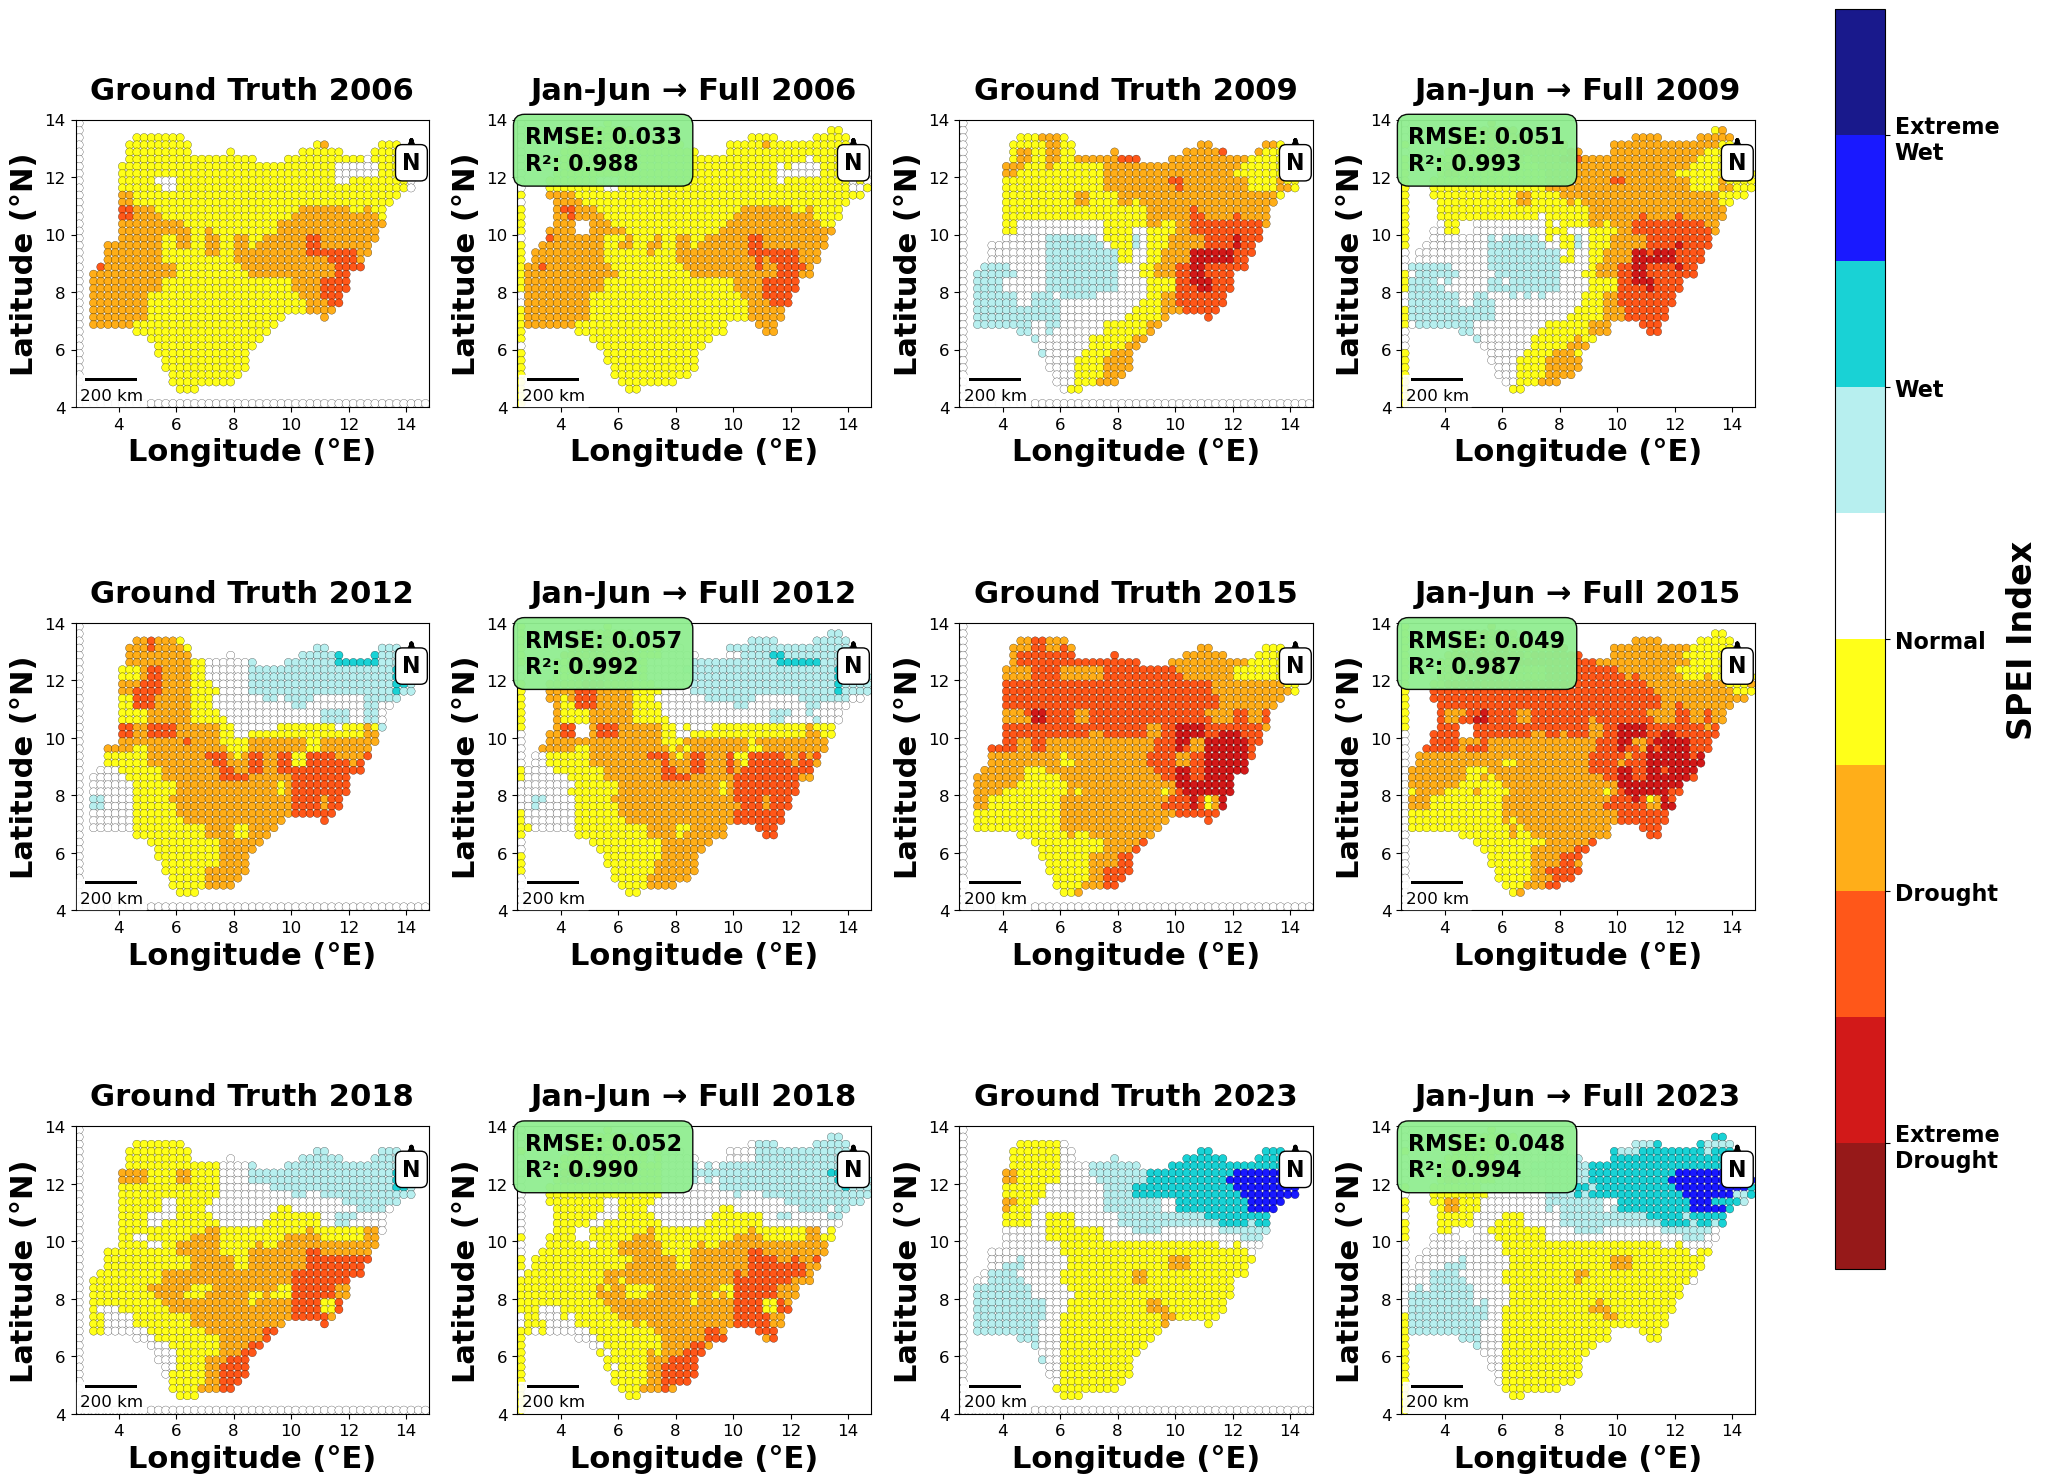

\n✅ Early Warning plots created successfully!
📁 Saved: early_warning_comparison.png
\n================================================================================
🎯 EARLY WARNING SYSTEM COMPLETE!
📁 Using existing ML results - no recalculation needed!


In [34]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from matplotlib.colors import ListedColormap
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

try:
    from matplotlib_scalebar.scalebar import ScaleBar
except ImportError:
    print("Installing matplotlib-scalebar...")
    import subprocess
    subprocess.check_call(["pip", "install", "matplotlib-scalebar"])
    from matplotlib_scalebar.scalebar import ScaleBar

class SPEIEarlyWarningSystem:
    def __init__(self, predictor):
        """
        Initialize Early Warning System using existing ML results
        
        Args:
            predictor: Trained EnhancedSPEIPredictor object with results
        """
        self.predictor = predictor
        self.best_model_name = predictor.best_model
        
        # SPEI colormap
        spei_colors = ['#8B0000', '#CD0000', '#FF4500', '#FFA500', '#FFFF00', 
                      '#FFFFFF', '#AFEEEE', '#00CED1', '#0000FF', '#000080']
        self.spei_cmap = ListedColormap(spei_colors)
        
        print(f"Early Warning System initialized with {self.best_model_name.upper()} model")
        print("Using existing ML results - no recalculation needed!")

    def extract_valid_coordinates_and_values(self, data_array):
        """Extract coordinates and values from valid pixels"""
        if data_array is None:
            return [], [], []
        
        height, width = data_array.shape
        valid_mask = ~np.isnan(data_array)
        
        if not np.any(valid_mask):
            return [], [], []
        
        rows, cols = np.where(valid_mask)
        
        lons = []
        lats = []
        values = []
        
        for row, col in zip(rows, cols):
            lon, lat = rasterio.transform.xy(self.predictor.target_transform, row, col)
            value = data_array[row, col]
            if np.isfinite(value):
                lons.append(lon)
                lats.append(lat)
                values.append(value)
        
        return lons, lats, values

    def add_map_elements(self, ax):
        """Add map elements with proper aspect ratio"""
        ax.set_aspect('equal', adjustable='box')
        
        # North arrow
        arrow_props = dict(arrowstyle='->', lw=3, color='black')
        ax.annotate('N', xy=(0.95, 0.95), xytext=(0.95, 0.85),
                   xycoords='axes fraction', textcoords='axes fraction',
                   ha='center', va='center', fontsize=16, fontweight='bold',
                   arrowprops=arrow_props,
                   bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='black'))
        
        # Scale bar
        scalebar = ScaleBar(111000, units='m', location='lower left', 
                           length_fraction=0.25, box_alpha=0.9,
                           color='black', box_color='white', font_properties={'size': 12})
        ax.add_artist(scalebar)
        
        # Labels
        ax.set_xlabel('Longitude (°E)', fontsize=22, fontweight='bold')
        ax.set_ylabel('Latitude (°N)', fontsize=22, fontweight='bold')
        ax.tick_params(labelsize=12)

    def plot_early_warning_comparison(self, target_years=None):
        """
        Create comparison plots using existing ML results
        
        Args:
            target_years: Years to plot (if None, use priority years)
        """
        
        # Use priority years if not specified
        if target_years is None:
            target_years = [2006, 2009, 2012, 2015, 2018, 2023]
        
        # Check what years are available in existing predictions
        available_years = list(self.predictor.predictions.keys())
        plot_years = [year for year in target_years if year in available_years]
        
        print(f"Available years in ML results: {sorted(available_years)}")
        print(f"Requested years: {target_years}")
        print(f"Years to plot: {plot_years}")
        
        if not plot_years:
            print("❌ No requested years found in ML results!")
            return
        
        # Set Nigeria bounds
        bounds = [2.5, 14.8, 4.0, 14.0]  # [west, east, south, north]
        
        # Calculate grid layout
        n_years = len(plot_years)
        if n_years <= 2:
            n_rows, n_cols = n_years, 2
        elif n_years <= 4:
            n_rows, n_cols = 2, 4
        else:
            n_rows, n_cols = 3, 4
        
        print(f"Grid layout: {n_rows} rows × {n_cols} cols for {n_years} years")
        
        # Create figure
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6*n_rows))
        
        # Handle subplot array dimensions
        if n_rows == 1 and n_cols == 1:
            axes = np.array([[axes]])
        elif n_rows == 1:
            axes = axes.reshape(1, -1)
        elif n_cols == 1:
            axes = axes.reshape(-1, 1)
        
        # Plot each year
        for plot_idx, year in enumerate(plot_years):
            print(f"Plotting year {year}...")
            
            # Get existing ML results
            ml_result = self.predictor.predictions[year]
            ground_truth = ml_result['ground_truth']
            
            # Get best model prediction
            best_model_prediction = None
            if 'predictions' in ml_result and self.best_model_name in ml_result['predictions']:
                best_model_prediction = ml_result['predictions'][self.best_model_name]
            
            # Calculate grid positions
            if n_years <= 2:
                row = plot_idx
                col_gt = 0
                col_pred = 1
            else:
                row = plot_idx // 2
                base_col = (plot_idx % 2) * 2
                col_gt = base_col
                col_pred = base_col + 1
            
            # Ensure we don't exceed bounds
            if row >= n_rows or col_pred >= n_cols:
                continue
            
            # Ground Truth (left)
            ax_gt = axes[row, col_gt]
            
            if ground_truth is not None:
                lons, lats, values = self.extract_valid_coordinates_and_values(ground_truth)
                
                if len(values) > 0:
                    scatter_gt = ax_gt.scatter(lons, lats, c=values, cmap=self.spei_cmap, 
                                             vmin=-2.5, vmax=2.5, s=35, alpha=0.9, 
                                             edgecolors='black', linewidths=0.2)
                    ax_gt.set_xlim(bounds[0], bounds[1])
                    ax_gt.set_ylim(bounds[2], bounds[3])
                    ax_gt.set_title(f'Ground Truth {year}', 
                                   fontsize=22, fontweight='bold', pad=15)
                    self.add_map_elements(ax_gt)
                    im_ref = scatter_gt
                else:
                    ax_gt.text(0.5, 0.5, f'No Data\\n{year}', ha='center', va='center', 
                              transform=ax_gt.transAxes, fontsize=18, fontweight='bold')
                    ax_gt.set_xlim(bounds[0], bounds[1])
                    ax_gt.set_ylim(bounds[2], bounds[3])
                    self.add_map_elements(ax_gt)
            else:
                ax_gt.text(0.5, 0.5, f'No Ground Truth\\n{year}', ha='center', va='center', 
                          transform=ax_gt.transAxes, fontsize=18, fontweight='bold')
                ax_gt.set_xlim(bounds[0], bounds[1])
                ax_gt.set_ylim(bounds[2], bounds[3])
                self.add_map_elements(ax_gt)
            
            # Early Warning Prediction (right) 
            ax_pred = axes[row, col_pred]
            
            if best_model_prediction is not None:
                pred_lons, pred_lats, pred_values = self.extract_valid_coordinates_and_values(best_model_prediction)
                
                if len(pred_values) > 0:
                    scatter_pred = ax_pred.scatter(pred_lons, pred_lats, c=pred_values, 
                                                 cmap=self.spei_cmap, vmin=-2.5, vmax=2.5, 
                                                 s=35, alpha=0.9, edgecolors='black', 
                                                 linewidths=0.2)
                    ax_pred.set_xlim(bounds[0], bounds[1])
                    ax_pred.set_ylim(bounds[2], bounds[3])
                    ax_pred.set_title(f'Jan-Jun → Full {year}', 
                                     fontsize=22, fontweight='bold', pad=15)
                    self.add_map_elements(ax_pred)
                    
                    # Calculate and display metrics
                    if ground_truth is not None:
                        valid_mask = ~(np.isnan(ground_truth) | np.isnan(best_model_prediction))
                        if np.sum(valid_mask) > 0:
                            gt_valid = ground_truth[valid_mask]
                            pred_valid = best_model_prediction[valid_mask]
                            
                            rmse = np.sqrt(mean_squared_error(gt_valid, pred_valid))
                            r2 = r2_score(gt_valid, pred_valid)
                            
                            # Color code performance
                            if r2 > 0.8:
                                box_color = 'lightgreen'
                            elif r2 > 0.6:
                                box_color = 'lightblue'
                            else:
                                box_color = 'lightyellow'
                            
                            metrics_text = f'RMSE: {rmse:.3f}\nR²: {r2:.3f}'
                            ax_pred.text(0.02, 0.98, metrics_text,
                                       transform=ax_pred.transAxes, verticalalignment='top',
                                       bbox=dict(boxstyle="round,pad=0.5", facecolor=box_color, 
                                               alpha=0.95, edgecolor='black'),
                                       fontsize=16, fontweight='bold')
                    
                    if 'im_ref' not in locals():
                        im_ref = scatter_pred
                else:
                    ax_pred.text(0.5, 0.5, f'No Data\\n{year}', 
                               ha='center', va='center', transform=ax_pred.transAxes, 
                               fontsize=18, fontweight='bold')
                    ax_pred.set_xlim(bounds[0], bounds[1])
                    ax_pred.set_ylim(bounds[2], bounds[3])
                    self.add_map_elements(ax_pred)
            else:
                ax_pred.text(0.5, 0.5, f'No {self.best_model_name.upper()}\\n{year}', 
                           ha='center', va='center', transform=ax_pred.transAxes, 
                           fontsize=18, fontweight='bold')
                ax_pred.set_xlim(bounds[0], bounds[1])
                ax_pred.set_ylim(bounds[2], bounds[3])
                self.add_map_elements(ax_pred)
        
        # Hide unused subplots
        total_used = len(plot_years) * 2
        total_subplots = n_rows * n_cols
        
        for i in range(total_used, total_subplots):
            row = i // n_cols
            col = i % n_cols
            if row < n_rows and col < n_cols:
                axes[row, col].axis('off')
        
        # Add colorbar
        if 'im_ref' in locals():
            cbar_ax = fig.add_axes([0.92, 0.15, 0.025, 0.7])
            cbar = fig.colorbar(im_ref, cax=cbar_ax)
            cbar.set_label('SPEI Index', rotation=90, labelpad=5, fontsize=24, fontweight='bold')
            
            # Simplified colorbar labels
            cbar_ticks = [-2.0, -1.0, 0.0, 1.0, 2.0]
            cbar_labels = ['Extreme\nDrought', 'Drought', 'Normal', 'Wet', 'Extreme\nWet']
            cbar.set_ticks(cbar_ticks)
            cbar.set_ticklabels(cbar_labels, fontsize=16, fontweight='bold')
        
        # Add titles
        #fig.suptitle(f'Ground Truth vs Model Predictions', 
                    #fontsize=28, fontweight='bold', y=0.95)
        
        #subtitle = f'{self.best_model_name.upper()} Model Results'
        #fig.text(0.5, 0.90, subtitle, ha='center', va='center', 
                #fontsize=20, style='italic', color='darkblue')
        
        plt.tight_layout()
        plt.subplots_adjust(top=0.85, right=0.88, wspace=0.25, hspace=-0.01)
        plt.savefig('early_warning_comparison.png', dpi=500, bbox_inches='tight', 
                   facecolor='white', edgecolor='none')
        plt.show()
        
        print(f"\\n✅ Early Warning plots created successfully!")
        print(f"📁 Saved: early_warning_comparison.png")

def create_early_warning_system(predictor, target_years=None):
    """
    Create Early Warning System using existing ML results
    
    Args:
        predictor: Trained EnhancedSPEIPredictor object with results
        target_years: Years to plot (default: [2006, 2009, 2012, 2015, 2018, 2023])
    """
    
    print("="*80)
    print("🚨 SPEI EARLY WARNING SYSTEM 🚨")
    print("="*80)
    
    # Check available results
    if not hasattr(predictor, 'predictions') or not predictor.predictions:
        print("❌ No ML predictions found! Run the main ML pipeline first.")
        return None
    
    available_years = sorted(list(predictor.predictions.keys()))
    print(f"Available ML results for years: {available_years}")
    
    if not hasattr(predictor, 'best_model') or not predictor.best_model:
        print("❌ No best model found! Run the main ML pipeline first.")
        return None
    
    print(f"Best model: {predictor.best_model.upper()}")
    
    # Initialize Early Warning System
    ews = SPEIEarlyWarningSystem(predictor)
    
    # Set default target years if not specified
    if target_years is None:
        target_years = [2006, 2009, 2012, 2015, 2018, 2023]
    
    # Create comparison plots
    print("\\n📊 Creating Early Warning comparison plots...")
    ews.plot_early_warning_comparison(target_years)
    
    print("\\n" + "="*80)
    print("🎯 EARLY WARNING SYSTEM COMPLETE!")
    print("📁 Using existing ML results - no recalculation needed!")
    print("="*80)
    
    return ews

# Example usage:
ews = create_early_warning_system(predictor)
# or specify custom years:
# ews = create_early_warning_system(predictor, target_years=[2006, 2009, 2012, 2015, 2018, 2023])

In [19]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from scipy import stats
from collections import defaultdict
import re

class NigeriaSPEIAnalyzer:
    """
    Class to load and analyze Nigeria SPEI data with format: Nigeria_SPEI_1month_year.tif
    """
    
    def __init__(self, base_dir):
        """
        Initialize the Nigeria SPEI analyzer
        
        Parameters:
        base_dir (str): Base directory where SPEI files are stored
        """
        self.base_dir = base_dir
        self.spei_datasets = {}
        self.spei_by_year = {}
        self.all_spei_values = None
        self.years_available = []
        
    def load_nigeria_spei_data(self, time_scale="1month", verbose=True):
        """
        Load all Nigeria SPEI files with the specified time scale
        
        Parameters:
        time_scale (str): Time scale for SPEI (e.g., "1month", "3month", "6month", "12month")
        verbose (bool): Print loading progress
        
        Returns:
        dict: Loaded SPEI datasets
        """
        
        # Search pattern for Nigeria SPEI files
        pattern = os.path.join(self.base_dir, f"Nigeria_SPEI_{time_scale}_*.tif")
        matching_files = sorted(glob(pattern))
        
        if verbose:
            print(f"NIGERIA SPEI DATA LOADER - {time_scale}")
            print("="*60)
            print(f"Search pattern: Nigeria_SPEI_{time_scale}_*.tif")
            print(f"Base directory: {self.base_dir}")
            print(f"Found {len(matching_files)} SPEI files")
            print("-"*60)
        
        if not matching_files:
            print("❌ No SPEI files found! Please check:")
            print(f"   - Directory: {self.base_dir}")
            print(f"   - File pattern: Nigeria_SPEI_{time_scale}_YYYY.tif")
            return None
        
        # Load each file
        all_values_list = []
        
        for filepath in matching_files:
            filename = os.path.basename(filepath)
            
            # Extract year from filename
            year = self._extract_year_from_filename(filename)
            
            if verbose:
                print(f"📂 Loading: {filename}")
            
            try:
                with rasterio.open(filepath) as src:
                    data = src.read(1)  # Read first band
                    
                    # Get valid (non-NaN) values
                    valid_mask = ~np.isnan(data)
                    valid_data = data[valid_mask]
                    
                    # Store dataset information
                    dataset_key = f"SPEI_{year}"
                    self.spei_datasets[dataset_key] = {
                        "data": data,
                        "valid_data": valid_data,
                        "meta": src.meta,
                        "transform": src.transform,
                        "bounds": src.bounds,
                        "crs": src.crs,
                        "year": year,
                        "filename": filename,
                        "filepath": filepath,
                        "valid_pixels": len(valid_data),
                        "total_pixels": data.size,
                        "coverage": len(valid_data) / data.size * 100
                    }
                    
                    # Store by year for easy access
                    self.spei_by_year[year] = valid_data
                    
                    # Add to combined list
                    all_values_list.extend(valid_data)
                    
                    if verbose:
                        print(f"   ✅ Year: {year} | Shape: {data.shape} | Valid pixels: {len(valid_data):,} ({len(valid_data)/data.size*100:.1f}%)")
                        print(f"      Range: [{np.min(valid_data):.3f}, {np.max(valid_data):.3f}] | Mean: {np.mean(valid_data):.3f}")
                    
            except Exception as e:
                if verbose:
                    print(f"   ❌ Error loading {filename}: {e}")
                continue
        
        # Store combined data
        if all_values_list:
            self.all_spei_values = np.array(all_values_list)
            self.years_available = sorted(list(self.spei_by_year.keys()))
            
            if verbose:
                print(f"\n📊 LOADING SUMMARY:")
                print(f"   Successfully loaded: {len(self.spei_datasets)} datasets")
                print(f"   Years available: {self.years_available}")
                print(f"   Total SPEI values: {len(self.all_spei_values):,}")
                print(f"   Combined range: [{np.min(self.all_spei_values):.3f}, {np.max(self.all_spei_values):.3f}]")
                print("="*60)
        
        return self.spei_datasets
    
    def _extract_year_from_filename(self, filename):
        """Extract year from Nigeria SPEI filename"""
        # Look for 4-digit year at the end of filename (before .tif)
        year_match = re.search(r'_(\d{4})\.tif$', filename)
        if year_match:
            return int(year_match.group(1))
        
        # Fallback: look for any 4-digit year
        year_match = re.search(r'(19|20)\d{2}', filename)
        if year_match:
            return int(year_match.group())
        
        return "unknown"
    
    def calculate_comprehensive_statistics(self, data_subset=None, subset_name="Complete Dataset"):
        """
        Calculate comprehensive SPEI statistics
        
        Parameters:
        data_subset (array-like): Specific subset of data to analyze (if None, uses all data)
        subset_name (str): Name for the analysis
        
        Returns:
        dict: Comprehensive statistics
        """
        
        if data_subset is None:
            if self.all_spei_values is None:
                print("❌ No SPEI data loaded. Run load_nigeria_spei_data() first.")
                return None
            data_subset = self.all_spei_values
        
        spei_clean = np.array(data_subset).flatten()
        spei_clean = spei_clean[~np.isnan(spei_clean)]
        
        if len(spei_clean) == 0:
            print(f"❌ No valid SPEI data found in {subset_name}")
            return None
        
        # Basic statistics
        stats_dict = {
            'dataset_name': subset_name,
            'count': len(spei_clean),
            'mean': np.round(np.mean(spei_clean), 4),
            'median': np.round(np.median(spei_clean), 4),
            'std_dev': np.round(np.std(spei_clean, ddof=1), 4),
            'variance': np.round(np.var(spei_clean, ddof=1), 4),
            'min_value': np.round(np.min(spei_clean), 4),
            'max_value': np.round(np.max(spei_clean), 4),
            'range': np.round(np.max(spei_clean) - np.min(spei_clean), 4),
            'skewness': np.round(stats.skew(spei_clean), 4),
            'kurtosis': np.round(stats.kurtosis(spei_clean), 4)
        }
        
        # Percentiles
        percentiles = [5, 10, 25, 50, 75, 90, 95]
        for p in percentiles:
            stats_dict[f'p{p}'] = np.round(np.percentile(spei_clean, p), 4)
        
        # SPEI drought/wet categories based on standard thresholds
        extreme_dry = np.sum(spei_clean <= -2.0)
        severe_dry = np.sum((spei_clean > -2.0) & (spei_clean <= -1.5))
        moderate_dry = np.sum((spei_clean > -1.5) & (spei_clean <= -1.0))
        mild_dry = np.sum((spei_clean > -1.0) & (spei_clean <= -0.5))
        normal = np.sum((spei_clean > -0.5) & (spei_clean <= 0.5))
        mild_wet = np.sum((spei_clean > 0.5) & (spei_clean <= 1.0))
        moderate_wet = np.sum((spei_clean > 1.0) & (spei_clean <= 1.5))
        severe_wet = np.sum((spei_clean > 1.5) & (spei_clean <= 2.0))
        extreme_wet = np.sum(spei_clean > 2.0)
        
        total_count = len(spei_clean)
        
        # Add drought/wet category statistics
        stats_dict.update({
            'extreme_drought_count': extreme_dry,
            'extreme_drought_pct': np.round(extreme_dry/total_count*100, 2),
            'severe_drought_count': severe_dry,
            'severe_drought_pct': np.round(severe_dry/total_count*100, 2),
            'moderate_drought_count': moderate_dry,
            'moderate_drought_pct': np.round(moderate_dry/total_count*100, 2),
            'mild_drought_count': mild_dry,
            'mild_drought_pct': np.round(mild_dry/total_count*100, 2),
            'normal_count': normal,
            'normal_pct': np.round(normal/total_count*100, 2),
            'mild_wet_count': mild_wet,
            'mild_wet_pct': np.round(mild_wet/total_count*100, 2),
            'moderate_wet_count': moderate_wet,
            'moderate_wet_pct': np.round(moderate_wet/total_count*100, 2),
            'severe_wet_count': severe_wet,
            'severe_wet_pct': np.round(severe_wet/total_count*100, 2),
            'extreme_wet_count': extreme_wet,
            'extreme_wet_pct': np.round(extreme_wet/total_count*100, 2)
        })
        
        # Additional drought-specific statistics
        drought_values = spei_clean[spei_clean < -0.5]  # All drought conditions
        wet_values = spei_clean[spei_clean > 0.5]  # All wet conditions
        
        if len(drought_values) > 0:
            stats_dict['drought_mean_intensity'] = np.round(np.mean(drought_values), 4)
            stats_dict['drought_max_intensity'] = np.round(np.min(drought_values), 4)
            stats_dict['total_drought_pct'] = np.round(len(drought_values)/total_count*100, 2)
            
        if len(wet_values) > 0:
            stats_dict['wet_mean_intensity'] = np.round(np.mean(wet_values), 4)
            stats_dict['wet_max_intensity'] = np.round(np.max(wet_values), 4)
            stats_dict['total_wet_pct'] = np.round(len(wet_values)/total_count*100, 2)
        
        return stats_dict
    
    def display_statistics(self, stats_dict):
        """Display statistics in a formatted, readable way"""
        
        if stats_dict is None:
            return
        
        print(f"\n{'='*70}")
        print(f"🇳🇬 NIGERIA SPEI STATISTICS: {stats_dict['dataset_name']}")
        print(f"{'='*70}")
        
        # Basic Statistics
        print(f"\n📊 BASIC STATISTICS")
        print(f"{'-'*50}")
        print(f"{'Total Observations':<25} {stats_dict['count']:>15,}")
        print(f"{'Mean':<25} {stats_dict['mean']:>15}")
        print(f"{'Median':<25} {stats_dict['median']:>15}")
        print(f"{'Standard Deviation':<25} {stats_dict['std_dev']:>15}")
        print(f"{'Minimum':<25} {stats_dict['min_value']:>15}")
        print(f"{'Maximum':<25} {stats_dict['max_value']:>15}")
        print(f"{'Range':<25} {stats_dict['range']:>15}")
        print(f"{'Skewness':<25} {stats_dict['skewness']:>15}")
        print(f"{'Kurtosis':<25} {stats_dict['kurtosis']:>15}")
        
        # Percentiles
        print(f"\n📈 PERCENTILES")
        print(f"{'-'*50}")
        print(f"{'5th Percentile':<25} {stats_dict['p5']:>15}")
        print(f"{'10th Percentile':<25} {stats_dict['p10']:>15}")
        print(f"{'25th Percentile':<25} {stats_dict['p25']:>15}")
        print(f"{'50th Percentile (Median)':<25} {stats_dict['p50']:>15}")
        print(f"{'75th Percentile':<25} {stats_dict['p75']:>15}")
        print(f"{'90th Percentile':<25} {stats_dict['p90']:>15}")
        print(f"{'95th Percentile':<25} {stats_dict['p95']:>15}")
        
        # Drought/Wet Categories
        print(f"\n🌡️ SPEI CATEGORIES DISTRIBUTION")
        print(f"{'-'*65}")
        categories = [
            ('Extreme Drought (≤-2.0)', 'extreme_drought_count', 'extreme_drought_pct'),
            ('Severe Drought (-2.0 to -1.5)', 'severe_drought_count', 'severe_drought_pct'),
            ('Moderate Drought (-1.5 to -1.0)', 'moderate_drought_count', 'moderate_drought_pct'),
            ('Mild Drought (-1.0 to -0.5)', 'mild_drought_count', 'mild_drought_pct'),
            ('Normal (-0.5 to 0.5)', 'normal_count', 'normal_pct'),
            ('Mild Wet (0.5 to 1.0)', 'mild_wet_count', 'mild_wet_pct'),
            ('Moderate Wet (1.0 to 1.5)', 'moderate_wet_count', 'moderate_wet_pct'),
            ('Severe Wet (1.5 to 2.0)', 'severe_wet_count', 'severe_wet_pct'),
            ('Extreme Wet (>2.0)', 'extreme_wet_count', 'extreme_wet_pct')
        ]
        
        for category_name, count_key, pct_key in categories:
            if count_key in stats_dict:
                count = stats_dict[count_key]
                pct = stats_dict[pct_key]
                print(f"{category_name:<35} {count:>8,} ({pct:>5.1f}%)")
        
        # Summary intensities
        print(f"\n💧 DROUGHT/WET INTENSITY SUMMARY")
        print(f"{'-'*50}")
        if 'drought_mean_intensity' in stats_dict:
            print(f"{'Total Drought Conditions':<30} {stats_dict.get('total_drought_pct', 0):>8.1f}%")
            print(f"{'Mean Drought Intensity':<30} {stats_dict['drought_mean_intensity']:>15}")
            print(f"{'Maximum Drought Intensity':<30} {stats_dict['drought_max_intensity']:>15}")
        
        if 'wet_mean_intensity' in stats_dict:
            print(f"{'Total Wet Conditions':<30} {stats_dict.get('total_wet_pct', 0):>8.1f}%")
            print(f"{'Mean Wet Intensity':<30} {stats_dict['wet_mean_intensity']:>15}")
            print(f"{'Maximum Wet Intensity':<30} {stats_dict['wet_max_intensity']:>15}")
        
        print(f"\n{'='*70}")
    
    def analyze_complete_dataset(self):
        """Analyze the complete SPEI dataset"""
        stats = self.calculate_comprehensive_statistics(
            data_subset=self.all_spei_values, 
            subset_name="Complete Nigeria SPEI Dataset"
        )
        self.display_statistics(stats)
        return stats
    
    def analyze_by_year(self, year):
        """Analyze SPEI for a specific year"""
        if year not in self.spei_by_year:
            print(f"❌ Year {year} not available. Available years: {self.years_available}")
            return None
        
        year_data = self.spei_by_year[year]
        stats = self.calculate_comprehensive_statistics(
            data_subset=year_data, 
            subset_name=f"Nigeria SPEI {year}"
        )
        self.display_statistics(stats)
        return stats
    
    def compare_years(self, years_list=None):
        """Compare statistics across multiple years"""
        if years_list is None:
            years_list = self.years_available
        
        print(f"\n{'='*80}")
        print(f"🔍 NIGERIA SPEI YEAR-BY-YEAR COMPARISON")
        print(f"{'='*80}")
        
        comparison_stats = {}
        for year in years_list:
            if year in self.spei_by_year:
                stats = self.calculate_comprehensive_statistics(
                    data_subset=self.spei_by_year[year], 
                    subset_name=f"SPEI {year}"
                )
                comparison_stats[year] = stats
        
        # Create comparison table
        if comparison_stats:
            print(f"\n📊 SUMMARY COMPARISON TABLE")
            print(f"{'-'*80}")
            print(f"{'Year':<6} {'Count':<8} {'Mean':<7} {'Std':<7} {'Min':<7} {'Max':<7} {'Drought%':<9} {'Wet%':<7}")
            print(f"{'-'*80}")
            
            for year, stats in comparison_stats.items():
                drought_pct = stats.get('total_drought_pct', 0)
                wet_pct = stats.get('total_wet_pct', 0)
                print(f"{year:<6} {stats['count']:<8,} {stats['mean']:<7.3f} {stats['std_dev']:<7.3f} "
                      f"{stats['min_value']:<7.3f} {stats['max_value']:<7.3f} {drought_pct:<9.1f} {wet_pct:<7.1f}")
        
        return comparison_stats

# ============================================================================
# MAIN ANALYSIS FUNCTION
# ============================================================================

def analyze_nigeria_spei(base_directory, time_scale="1month", specific_year=None):
    """
    Main function to load and analyze Nigeria SPEI data
    
    Parameters:
    base_directory (str): Path to directory containing SPEI files
    time_scale (str): SPEI time scale ("1month", "3month", "6month", "12month")
    specific_year (int): Analyze specific year (optional)
    
    Returns:
    tuple: (NigeriaSPEIAnalyzer instance, complete dataset statistics)
    """
    
    # Initialize analyzer
    analyzer = NigeriaSPEIAnalyzer(base_directory)
    
    # Load data
    datasets = analyzer.load_nigeria_spei_data(time_scale=time_scale)
    
    if datasets is None:
        return None, None
    
    # Analyze complete dataset
    print(f"\n🎯 ANALYZING COMPLETE NIGERIA SPEI DATASET")
    complete_stats = analyzer.analyze_complete_dataset()
    
    # Analyze specific year if requested
    if specific_year is not None:
        print(f"\n🎯 ANALYZING YEAR {specific_year}")
        year_stats = analyzer.analyze_by_year(specific_year)
    
    # Year-by-year comparison
    if len(analyzer.years_available) > 1:
        print(f"\n🎯 YEAR-BY-YEAR COMPARISON")
        comparison = analyzer.compare_years()
    
    return analyzer, complete_stats

# ============================================================================
# EXAMPLE USAGE
# ============================================================================

if __name__ == "__main__":
    # Set your directory path
    BASE_DIR = 'C:/Users/Rasheed/Documents/GRACE RESEARCH/ML'
    
    print("🇳🇬 NIGERIA SPEI DATA ANALYZER")
    print("="*60)
    print(f"Directory: {BASE_DIR}")
    print("Expected file format: Nigeria_SPEI_1month_YYYY.tif")
    print("="*60)
    
    # Example usage:
    analyzer, stats = analyze_nigeria_spei(BASE_DIR, time_scale="1month")
    
    # Or analyze specific year:
    # analyzer, stats = analyze_nigeria_spei(BASE_DIR, time_scale="1month", specific_year=2023)
    
    print("\n📋 TO RUN THE ANALYSIS:")
    print("analyzer, stats = analyze_nigeria_spei(BASE_DIR, time_scale='1month')")
    print("\n📋 TO ANALYZE SPECIFIC YEAR:")
    print("analyzer.analyze_by_year(2023)")
    print("\n📋 TO COMPARE ALL YEARS:")
    print("analyzer.compare_years()")

🇳🇬 NIGERIA SPEI DATA ANALYZER
Directory: C:/Users/Rasheed/Documents/GRACE RESEARCH/ML
Expected file format: Nigeria_SPEI_1month_YYYY.tif
NIGERIA SPEI DATA LOADER - 1month
Search pattern: Nigeria_SPEI_1month_*.tif
Base directory: C:/Users/Rasheed/Documents/GRACE RESEARCH/ML
Found 21 SPEI files
------------------------------------------------------------
📂 Loading: Nigeria_SPEI_1month_2003.tif
   ✅ Year: 2003 | Shape: (215, 268) | Valid pixels: 37,731 (65.5%)
      Range: [-1.851, 0.561] | Mean: -0.454
📂 Loading: Nigeria_SPEI_1month_2004.tif
   ✅ Year: 2004 | Shape: (215, 268) | Valid pixels: 37,731 (65.5%)
      Range: [-1.557, 1.070] | Mean: -0.003
📂 Loading: Nigeria_SPEI_1month_2005.tif
   ✅ Year: 2005 | Shape: (215, 268) | Valid pixels: 37,731 (65.5%)
      Range: [-1.164, 1.023] | Mean: -0.200
📂 Loading: Nigeria_SPEI_1month_2006.tif
   ✅ Year: 2006 | Shape: (215, 268) | Valid pixels: 37,731 (65.5%)
      Range: [-1.558, 0.196] | Mean: -0.491
📂 Loading: Nigeria_SPEI_1month_2007.tif
 